In [1]:
import os

# change working directory, run this cell once
os.chdir("../")

The purpose of this notebook is to compare the performance of 3 hyperparameter optimization approaches:
- Random sampling optimization
- Bayesian Optimization (SMAC)
- Bayesian Optimization (SMAC) with KDTree Warmstarter (Meta-Learning)

for clustering tasks.

### Import packages for decoding log files

In [2]:
from decode_logs import Decoder
from utils.plotting import plot_convergence, plot_convergence_average
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
d2 = Decoder.decode_log_file_completely('log/benchmark_experiment_2_v0-2019-08-06_19-55-07-13747/meta.log')
d3 = Decoder.decode_log_file_completely('log/benchmark_experiment_3_v0-2019-08-06_19-55-27-91033/meta.log')
d4 = Decoder.decode_log_file_completely('log/benchmark_experiment_4_v0-2019-08-06_19-55-48-42352/meta.log')

The log files are decoded as a dictionary.

In [4]:
print("The algorithms are tested on {} datasets: \n{}".format(len(d2.keys()), list(d2.keys())))

The algorithms are tested on 20 datasets: 
['g2-16-90.csv', 's4.csv', 'dim032.csv', 'birch2.csv', 'g2-256-60.csv', 'g2-32-20.csv', 'birch3.csv', 'dim6.csv', 'g2-32-100.csv', 'g2-32-40.csv', 'dim7.csv', 'dim512.csv', 'g2-8-100.csv', 'a3.csv', 'g2-16-50.csv', 'g2-256-50.csv', 'g2-512-20.csv', 'g2-2-60.csv', 'g2-2-90.csv', 'g2-2-50.csv']


In [5]:
print(len({len(d2[key]['runhistory']) for key in d2.keys()}) == 1)
print(len({len(d3[key]['runhistory']) for key in d3.keys()}) == 1)
print(len({len(d4[key]['runhistory']) for key in d3.keys()}) == 1)

True
True
True


This is just to verify that the number of evaluations used on each dataset are identical.

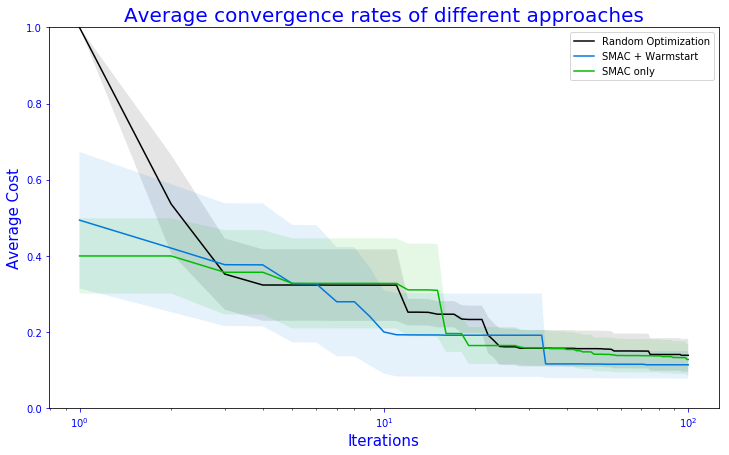

In [11]:
plot_params = {
    'data': {
        'Random Optimization': [d4[d]['convergence_curve'] for d in d4.keys()],
        'SMAC only': [d2[d]['convergence_curve'] for d in d2.keys()], 
        'SMAC + Warmstart': [d3[d]['convergence_curve'] for d in d3.keys()], 
    },
    'iterations': 'max',
    'title': 'Average convergence rates of different approaches',
    'area': True,
    'x_scale': 'log',
    'x_label': 'Iterations',
    'y_label': 'Average Cost',
    'font_color': 'Blue',
    'y_range': (0, 1),
}
plot_convergence_average(**plot_params)

- Clearly, random optimization has the slowest rate of convergence among the three algorithms.
- On average, SMAC + Warmstart outperforms SMAC, but its convergence rate at the beginning has higher variance.